In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

In [2]:
z = torch.zeros(5,3)

In [3]:
z

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [4]:
z.dtype

torch.float32

In [5]:
i = torch.ones(5,3, dtype=torch.int16)
i

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)

In [6]:
torch.manual_seed(1729)
r1 = torch.rand(2,2)
r1

tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

In [7]:
r2 = torch.rand(2,2)
r2

tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

In [8]:
torch.manual_seed(1729)
r3 = torch.rand(2,2)
r3

tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

In [9]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [10]:
import torchvision
import torchvision.transforms as transforms

In [11]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ]
)

In [12]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)

100%|██████████| 170M/170M [06:09<00:00, 462kB/s]    


Extracting ./data\cifar-10-python.tar.gz to ./data


In [13]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

In [14]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [15]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

In [16]:
dataiter = iter(trainloader)


In [17]:
images, labels = next(dataiter)

 bird  bird   car  deer


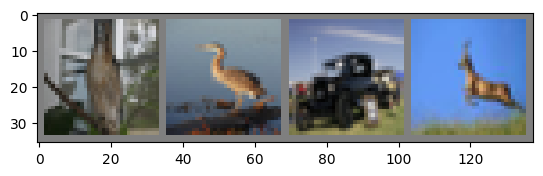

In [18]:
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [19]:
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [20]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [21]:
net = Net()

In [22]:
criterion = nn.CrossEntropyLoss()

In [23]:
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [24]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs , labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss/2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.187
[1,  4000] loss: 1.932
[1,  6000] loss: 1.747
[1,  8000] loss: 1.631
[1, 10000] loss: 1.527
[1, 12000] loss: 1.481
[2,  2000] loss: 1.411
[2,  4000] loss: 1.404
[2,  6000] loss: 1.338
[2,  8000] loss: 1.342
[2, 10000] loss: 1.300
[2, 12000] loss: 1.297
Finished Training


In [25]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100*correct/total))

Accuracy of the network on the 10000 test images: 9 %
